In [1]:
import requests
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from datetime import datetime
import time
import os

In [2]:
from matplotlib import colors
norm_angle = colors.Normalize(0,360)

In [3]:
with open("routesSampleFix.json") as fp:
    data=json.load(fp)

In [5]:
routes = {}
for r in data:
    r_ = {}
    routes[r['rid']] = r_
    for t in r['routeStates']:
        for v in t['vehicles']:
            if v['vid'] not in r_.keys():
                r_[v['vid']] = []
            r_[v['vid']].append({'time': int(t['vtime']), 'lat':v['lat'], 'lon':v['lon'], 'heading':v['heading']})

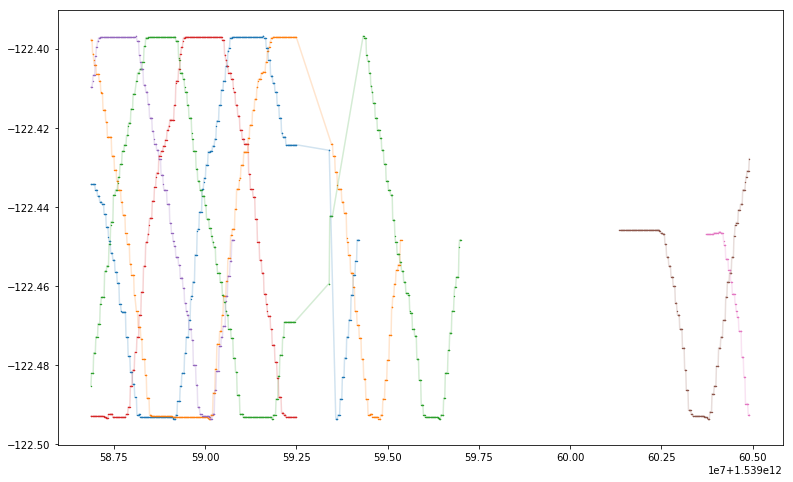

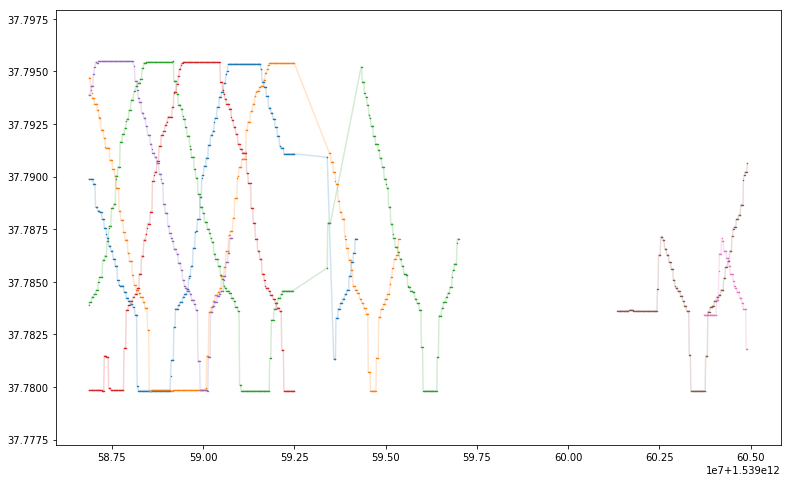

In [10]:
for dim in ['lon','lat']:
    plt.figure(figsize=[13,8])
    for vid in routes['1'].keys():
        plt.scatter([t['time'] for t in routes['1'][vid]],[t[dim] for t in routes['1'][vid]],s=2,linewidths=0)
        plt.plot([t['time'] for t in routes['1'][vid]],[t[dim] for t in routes['1'][vid]],alpha=.2)
    plt.show()

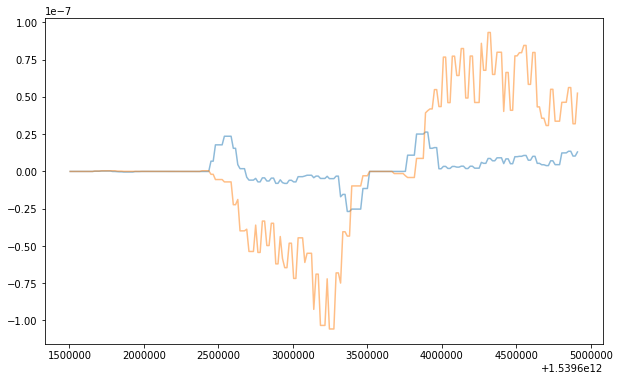

In [38]:
_rid = '1'
_vid = '5545'
_dt = 10
_states = routes[_rid][_vid]
_xrange = range(len(_states)-_dt)
_x = [_states[i+_dt]['time'] for i in _xrange]
_latspeed = [(_states[i+_dt]['lat']-_states[i]['lat'])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
_lonspeed = [(_states[i+_dt]['lon']-_states[i]['lon'])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]

plt.figure(figsize=[10,6])

for _speed in [_latspeed, _lonspeed]:
    plt.plot(_x,_speed,alpha=.5)
#     plt.scatter(_x,_speed,s=2,linewidths=0)
plt.show()

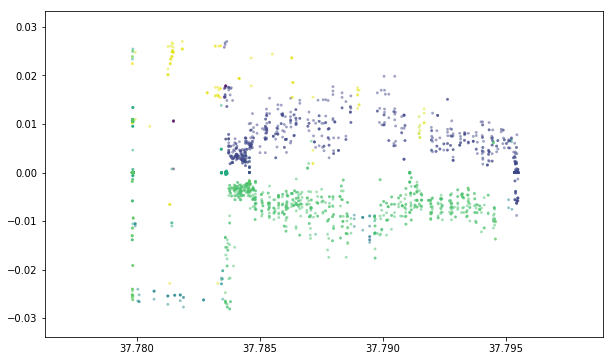

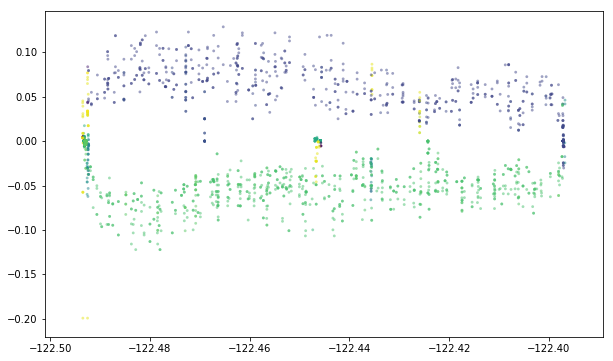

In [6]:
_dt = 10
_rid = '1'
_mult = 1e6

for dim in ['lat','lon']:
    plt.figure(figsize=[10,6])
    for _vid in routes[_rid].keys():
        _states = routes[_rid][_vid]
        _xrange = range(len(_states)-_dt)
#         _pos = [(_states[i][dim]+_states[i+_dt][dim])/2 for i in _xrange]
        _pos = [_states[i+_dt//2][dim] for i in _xrange]
        _speed = [_mult*(_states[i+_dt][dim]-_states[i][dim])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
        _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
        plt.scatter(_pos,_speed,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
#         plt.plot(_pos,_speed,c='blue',alpha=.1)
    plt.show()

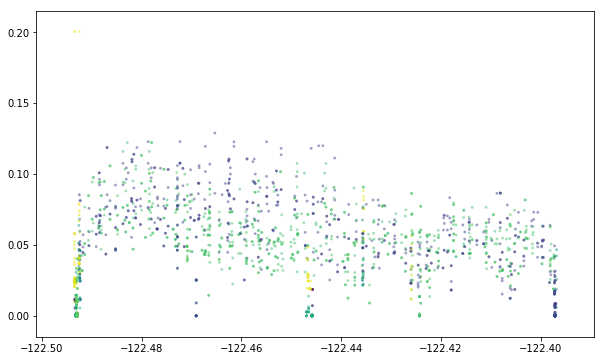

In [128]:
_dt = 10
_rid = '1'
_mult = 1e6

plt.figure(figsize=[10,6])
for _vid in routes[_rid].keys():
    _states = routes[_rid][_vid]
    _xrange = range(len(_states)-_dt)
#     _pos = [(_states[i]['lat']+_states[i+_dt]['lat'])/2 for i in _xrange]
    _pos = [_states[i+_dt//2]['lon'] for i in _xrange]
    _speed = [_mult*np.hypot(*[_states[i+_dt][dim]-_states[i][dim] for dim in ['lat','lon']])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
    _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
    plt.scatter(_pos,_speed,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
#     plt.plot(_pos,_speed,c='blue',alpha=.05)
plt.show()

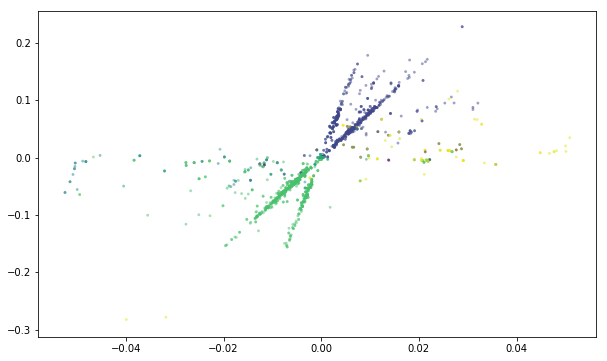

In [127]:
_dt = 5
_rid = '1'
_mult = 1e6

plt.figure(figsize=[10,6])
for _vid in routes[_rid].keys():
    _states = routes[_rid][_vid]
    _xrange = range(len(_states)-_dt)
#     _pos = [_states[i+_dt//2]['lon'] for i in _xrange]
    [_latspeed,_lonspeed] = [[_mult*(_states[i+_dt][dim]-_states[i][dim])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange] for dim in ['lat','lon']]
    _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
    plt.scatter(_latspeed,_lonspeed,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
plt.show()

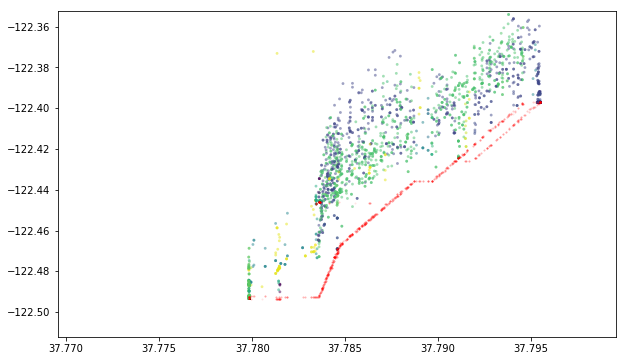

In [161]:
_dt = 10
_rid = '1'
_mult = 1e6

plt.figure(figsize=[10,6])

for _vid in routes[_rid].keys():
    _states = routes[_rid][_vid]
    _xrange = range(len(_states)-_dt)
    _lat = [_states[i+_dt//2]['lat'] for i in _xrange]
    _lon = [_states[i+_dt//2]['lon'] for i in _xrange]
    _speed = [_mult*np.hypot(*[_states[i+_dt][dim]-_states[i][dim] for dim in ['lat','lon']])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
    _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
    _x = [_lat[i] for i in _xrange]
    _y = [_lon[i]+_speed[i]*.6 for i in _xrange]
    plt.scatter(_x,_y,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
    plt.scatter(_x,_lon,c='r',s=4,linewidths=0,alpha=.1)
_xmid = np.median(_x)
_ymid = np.median(_y)
_rx = .015
_ry = .08
plt.xlim(_xmid-_rx,_xmid+_rx)
plt.ylim(_ymid-_ry,_ymid+_ry)
plt.show()

In [164]:
_dt = 10
_rid = '1'
_mult = 1e6
num_images = 10
max_z = .7
file_prefix = "images/route_1_speeds_20190403_"

for j in range(num_images):
    plt.figure(figsize=[10,6])

    for _vid in routes[_rid].keys():
        _states = routes[_rid][_vid]
        _xrange = range(len(_states)-_dt)
        _lat = [_states[i+_dt//2]['lat'] for i in _xrange]
        _lon = [_states[i+_dt//2]['lon'] for i in _xrange]
        _speed = [_mult*np.hypot(*[_states[i+_dt][dim]-_states[i][dim] for dim in ['lat','lon']])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
        _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
        _x = [_lat[i] for i in _xrange]
        _y = [_lon[i]+_speed[i]*(max_z*(j+1)/(num_images+1)) for i in _xrange]
        plt.scatter(_x,_y,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
        plt.scatter(_x,_lon,c='r',s=4,linewidths=0,alpha=.1)
        
    _xmid = 37.787
    _ymid = -122.43
    _rx = .015
    _ry = .08
    plt.xlim(_xmid-_rx,_xmid+_rx)
    plt.ylim(_ymid-_ry,_ymid+_ry)
    
    plt.savefig(file_prefix+str(j).zfill(2)+".png",dpi=60)
    plt.clf()
# plt.show()

C:\Miniconda\envs\PythonData\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


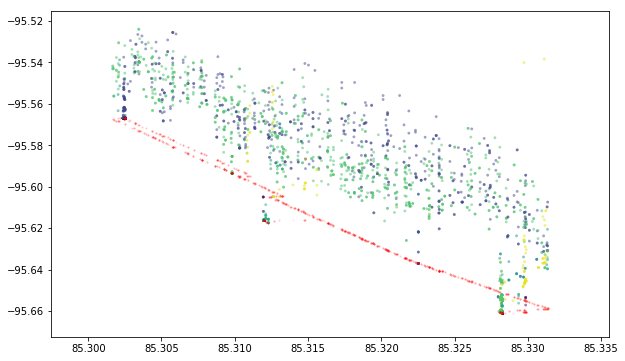

In [13]:
_dt = 10
_rid = '1'
_mult = 1e6
_angle = 2

plt.figure(figsize=[10,6])

_sin = np.sin(_angle)
_cos = np.cos(_angle)

for _vid in routes[_rid].keys():
    _states = routes[_rid][_vid]
    _xrange = range(len(_states)-_dt)
    _lat = [_states[i+_dt//2]['lat'] for i in _xrange]
    _lon = [_states[i+_dt//2]['lon'] for i in _xrange]
    _speed = [_mult*np.hypot(*[_states[i+_dt][dim]-_states[i][dim] for dim in ['lat','lon']])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
    _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
    _x = [_lat[i]*_sin+_lon[i]*_cos for i in _xrange]
    _yproj = [_lon[i]*_sin-_lat[i]*_cos for i in _xrange]
    _y = [_yproj[i]+_speed[i]*.6 for i in _xrange]
    plt.scatter(_x,_y,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
    plt.scatter(_x,_yproj,c='r',s=4,linewidths=0,alpha=.1)
# _xmid = np.median(_x)
# _ymid = np.median(_y)
# _rx = .015
# _ry = .08
# plt.xlim(_xmid-_rx,_xmid+_rx)
# plt.ylim(_ymid-_ry,_ymid+_ry)
plt.show()

In [16]:
# _dt = 20
_rid = '1'
_mult = 1e6
num_images = 30
_zscale = .7
file_prefix = "images/route_1_speeds_20190414_"

_da = np.pi/num_images*2

for j in range(num_images):
    _angle = _da*j
    _sin = np.sin(_angle)
    _cos = np.cos(_angle)

    plt.figure(figsize=[10,6])

    for _vid in routes[_rid].keys():
        _states = routes[_rid][_vid]
        _xrange = range(len(_states)-_dt)
        _lat = [_states[i+_dt//2]['lat'] for i in _xrange]
        _lon = [_states[i+_dt//2]['lon'] for i in _xrange]
        _speed = [_mult*np.hypot(*[_states[i+_dt][dim]-_states[i][dim] for dim in ['lat','lon']])/(_states[i+_dt]['time']-_states[i]['time']) for i in _xrange]
        _heading = [_states[i+_dt//2]['heading'] for i in _xrange]
        
        _x = [_lat[i]*_sin+_lon[i]*_cos for i in _xrange]
        _yproj = [_lon[i]*_sin-_lat[i]*_cos for i in _xrange]
        _y = [_yproj[i]+_speed[i]*.6 for i in _xrange]
#         _x = [_lat[i] for i in _xrange]
#         _y = [_lon[i]+_speed[i]*(max_z*(j+1)/(num_images+1)) for i in _xrange]
        plt.scatter(_x,_y,c=_heading,s=8,linewidths=0,alpha=.5,norm=norm_angle)
        plt.scatter(_x,_yproj,c='r',s=4,linewidths=0,alpha=.1)
    
    _xmid = np.median(_x)
    _ymid = np.median(_y)
    _rx = .08
    _ry = .08
    plt.xlim(_xmid-_rx,_xmid+_rx)
    plt.ylim(_ymid-_ry,_ymid+_ry)
    
    plt.savefig(file_prefix+str(j).zfill(2)+".png",dpi=60)
    plt.clf()

C:\Miniconda\envs\PythonData\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
